Personal Information



# Load Library

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from numpy import unique
from pandas import read_csv
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Tel-U/SEMESTER 4/assesment_3_ilmu_data/
!ls

#load data google drive
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

In [2]:
df = pd.read_csv('../dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data Pre Processing

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Categorical Encode
df['gender']          = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [5]:
X = df.drop(columns = 'diabetes', axis = 1)
y = df['diabetes']

In [6]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [8]:
X.shape, y.shape

((100000, 8), (100000,))

# Feature Scaling

In [9]:
import joblib
from sklearn.impute import SimpleImputer

# Mengisi NaN dengan mean dari setiap kolom
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

joblib.dump(X_imputed, '../model/X_imputed.sav')
X_imputed = joblib.load('../model/X_imputed.sav')

In [10]:
from imblearn.over_sampling import SMOTE,RandomOverSampler, SMOTENC, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek

oversample = SMOTE()
#oversample = SVMSMOTE()
X_smote, y_smote = oversample.fit_resample(X_imputed, y)

joblib.dump(X_smote, '../model/X_smote.sav')
joblib.dump(y_smote, '../model/y_smote.sav')

X_smote = joblib.load('../model/X_smote.sav')
y_smote = joblib.load('../model/y_smote.sav')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2)

In [12]:
scaler = StandardScaler()

scaler.fit(X_train)

joblib.dump(scaler, '../model/scaler.sav')
scaler = joblib.load('../model/scaler.sav')

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search untuk Klasifikasi - KNN

In [15]:
# isi jawaban parameter 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range 
param_grid = [
    # {'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    {'weights':['uniform','distance'], 'n_neighbors':[3,5], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    # {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
 ]

#tolong perhatikan parameter scoring dan cv 
classifier_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='recall', cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
classifier_knn.fit(X_train, y_train)

# print best parameter after tuning 
print('parameter terbaik:',classifier_knn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(classifier_knn.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.964 total time=   2.3s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.966 total time=   2.4s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.970 total time=   2.2s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.969 total time=   2.4s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.966 total time=   2.2s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.972 total time=   1.9s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.972 total time=   1.9s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.976 total time=   1.8s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.973 total time=   1.8s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.972 to

c:\Users\Glen Kusuma\miniconda3\envs\ildat-diabetes-prediction\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Glen Kusuma\miniconda3\envs\ildat-diabetes-prediction\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Glen Kusuma\miniconda3\envs\ildat-diabetes-prediction\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Glen Kusuma\miniconda3\envs\ildat-diabetes-p

parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


In [16]:
from sklearn.metrics import classification_report

predictions = classifier_knn.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18472
           1       0.96      0.98      0.97     18128

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [17]:
print("Model validation accuracy: %.2f%%" % (classifier_knn.score(X_test, y_test) * 100))

Model validation accuracy: 98.16%


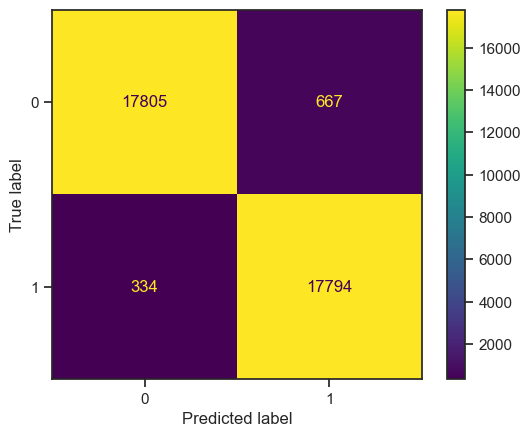

In [18]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier_knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier_knn.classes_)
disp.plot()

In [19]:
import joblib

# save the model to disk
filename = '../model/diabetes_prediction_classification_model.sav'
joblib.dump(classifier_knn.best_estimator_, filename)

# load the model from disk
loaded_model = joblib.load(filename)
print(loaded_model)
#result = loaded_model.score(X_test, y_test)
print('Hasil model menggunakan model yang sudah disimpan:', loaded_model.score(X_test, y_test))
print('Hasil model menggunakan model hasil training langsung:', classifier_knn.score(X_test, y_test))

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
Hasil model menggunakan model yang sudah disimpan: 0.9726502732240437
Hasil model menggunakan model hasil training langsung: 0.9815754633715799


# Grid Search untuk Klasifikasi - Decision Tree

In [ ]:
# isi jawaban parameter 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range 
param_grid = [
    #{'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    {'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
 ]

#tolong perhatikan parameter scoring dan cv 
classifier = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall', cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
classifier.fit(X_train, y_train)

# print best parameter after tuning 
print('parameter terbaik:',classifier.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(classifier.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.742 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.739 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.742 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.750 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=1.0;, score=0.487 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=1.0;, score=0.494 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=0.1, min_samples_split=1.0;, score=0.490 total

In [ ]:
from sklearn.metrics import classification_report

predictions = classifier.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     18320
           1       0.82      0.98      0.89     18280

    accuracy                           0.88     36600
   macro avg       0.90      0.88      0.88     36600
weighted avg       0.90      0.88      0.88     36600



In [ ]:
print("Model validation accuracy: %.2f%%" % (classifier.score(X_test, y_test) * 100))

Model validation accuracy: 97.63%


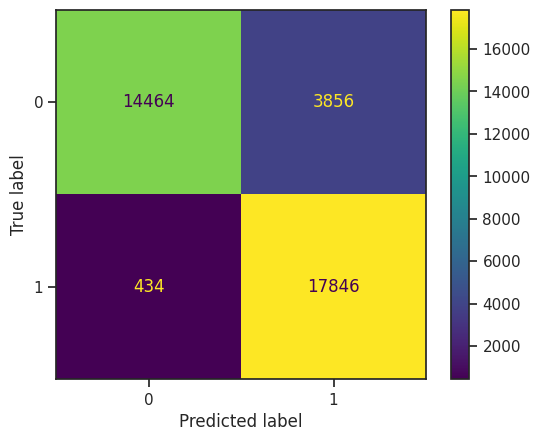

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()

# Grid Search untuk klasifikasi - Support Vector Machine

In [13]:
# isi jawaban di sini
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range 
param_grid = [
    #{'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    ]

#tolong perhatikan parameter scoring dan cv 
classifier_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, refit = True, verbose = 3) 

# fitting the model for grid search 
classifier_svm.fit(X_train, y_train)

# print best parameter after tuning 
print('parameter terbaik:',classifier_svm.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(classifier_svm.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.915 total time= 2.8min
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.914 total time= 3.2min
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.915 total time= 2.9min
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.916 total time= 2.9min
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.915 total time= 3.0min
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.893 total time= 3.5min
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.893 total time= 3.6min
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.893 total time= 3.4min
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.896 total time= 3.6min
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.894 total time= 3.6min
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.890 total time= 5.2min
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;

In [14]:
from sklearn.metrics import classification_report

predictions = classifier_svm.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18298
           1       0.96      0.91      0.94     18302

    accuracy                           0.94     36600
   macro avg       0.94      0.94      0.94     36600
weighted avg       0.94      0.94      0.94     36600



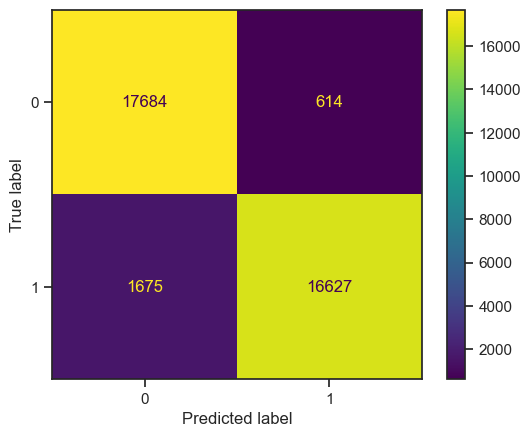

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=classifier_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier_svm.classes_)
disp.plot()

In [17]:
print("Model validation accuracy: %.2f%%" % (classifier_svm.score(X_test, y_test) * 100))

Model validation accuracy: 93.75%


In [16]:
joblib.dump(classifier_svm, '../model/classifier_svm.pkl')
joblib.dump(classifier_svm, '../model/classifier_svm.sav')

['../model/classifier_svm.sav']

In [13]:
# isi jawaban di sini
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range
param_grid = [
    #{'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    ]

#tolong perhatikan parameter scoring dan cv
classifier_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, refit = True, verbose = 3)

# fitting the model for grid search
classifier_svm.fit(X_train, y_train)

# print best parameter after tuning
print('parameter terbaik:',classifier_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.956 total time=29.0min
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.955 total time=27.0min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.954 total time=28.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.956 total time=27.3min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.954 total time=30.3min
[CV 1/5] END ...C=1000, gamma=1, kernel=linear;, score=0.894 total time=211.8min


# KNN

In [20]:
classifier_knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'distance')

In [21]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [ ]:
from sklearn.metrics import classification_report

predictions = classifier_knn.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions))

In [22]:
print("Model validation accuracy: %.2f%%" % (classifier_knn.score(X_test, y_test) * 100))

Model validation accuracy: 96.68%


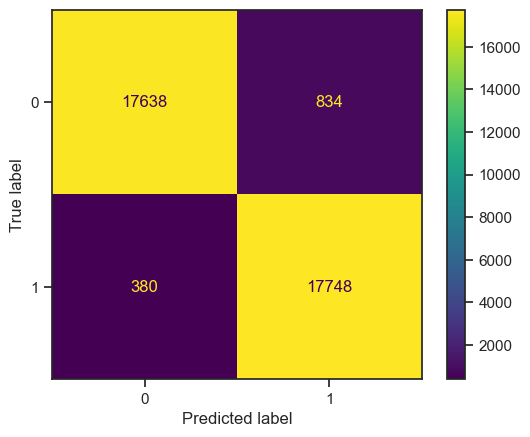

In [23]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier_knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier_knn.classes_)
disp.plot()

In [ ]:
# isi jawaban di sini
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

# defining parameter range
param_grid = [
    #{'weights':['uniform','distance'], 'n_neighbors':[3,5,7,9,11,13,15], 'metric':['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean']}
    #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15, None], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3],}
    ]

#tolong perhatikan parameter scoring dan cv
classifier_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, refit = True, verbose = 3)

# fitting the model for grid search
classifier_svm.fit(X_train, y_train)

# print best parameter after tuning
print('parameter terbaik:',classifier_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(classifier.best_estimator_)

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classifier_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier_svm.classes_)
disp.plot()